In [1]:
%matplotlib inline

# Keras 自动编码器(auto-encoder)

In [2]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from six.moves import xrange


In [3]:
import keras
from keras.datasets import mnist

num_classes = 10

(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255

print('training data: x =', x_train.shape)


Using TensorFlow backend.


training data: x = (60000, 784)


In [4]:
# hyper-parameter
training_epoch = 100
learning_rate = 1e-3
batch_size = 100
image_size = x_train.shape[-1]

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout

img_input = Input(shape=(image_size,))

# # method 1: use MODEL API
# encoder = Dense(256, activation='relu')(img_input)
# encoder = Dropout(0.2)(encoder)
# encoder = Dense(128, activation='relu')(encoder)
# encoder = Dropout(0.2)(encoder)
# encoder = Dense(5, activation='relu')(encoder)
#
# decoder = Dense(128, activation='relu')(encoder)
# decoder = Dropout(0.2)(decoder)
# decoder = Dense(256, activation='relu')(decoder)
# decoder = Dropout(0.2)(decoder)
# decoder = Dense(image_size, activation='sigmoid')(decoder)
#
# img_output = decoder


# method 2: use FUNCTION API
encoder = Sequential(name='encoder')
encoder.add(Dense(256, activation='relu', input_shape=(image_size,)))
encoder.add(Dropout(0.2))
encoder.add(Dense(128, activation='relu'))
encoder.add(Dropout(0.2))
encoder.add(Dense(5, activation='relu'))

decoder = Sequential(name='decoder')
decoder.add(Dense(128, activation='relu', input_shape=(5,)))
decoder.add(Dropout(0.2))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dropout(0.2))
decoder.add(Dense(image_size, activation='sigmoid'))

inner = encoder(img_input)
inner = decoder(inner)

img_output = inner

model = Model(inputs=img_input, outputs=img_output)
model.summary()

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MSE)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder (Sequential)         (None, 5)                 234501    
_________________________________________________________________
decoder (Sequential)         (None, 784)               235280    
Total params: 469,781
Trainable params: 469,781
Non-trainable params: 0
_________________________________________________________________


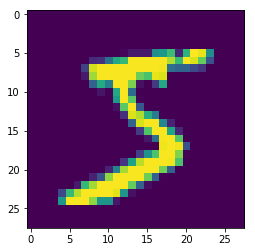

In [5]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

# plot original
original_image = np.reshape(a=x_train[0], newshape=(28, 28))
plt.imshow(original_image * 255)


Training epoch 10 / 100 ...
Training epoch 20 / 100 ...
Training epoch 30 / 100 ...
Training epoch 40 / 100 ...
Training epoch 50 / 100 ...
Training epoch 60 / 100 ...
Training epoch 70 / 100 ...
Training epoch 80 / 100 ...
Training epoch 90 / 100 ...
Training epoch 100 / 100 ...


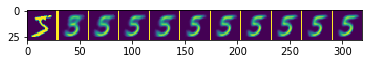

In [6]:
# visualization
img = original_image
blank = np.ones(shape=(28, 1))
img = np.concatenate((img, blank), axis=-1)

iteration_per_epoch = 10
for i in xrange(1, 1 + training_epoch / iteration_per_epoch):
    print('Training epoch %s / %s ...' % (i * iteration_per_epoch, training_epoch))
    model.fit(x=x_train, y=x_train,
              epochs=iteration_per_epoch,
              batch_size=500,
              verbose=0)

    img_pred = model.predict(x_train[:1])
    img = np.concatenate((img, blank, np.reshape(a=img_pred, newshape=(28, 28))), axis=-1)
plt.imshow(img * 255)


In [7]:
Image.fromarray(img * 255).convert('L')
